# XGBoost

**Import final_model from Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/Colab Notebooks/'

Mounted at /content/drive


In [2]:
pip install xgboost==1.7.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 4.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.1.1
    Uninstalling xgboost-3.1.1:
      Successfully uninstalled xgboost-3.1.1


In [3]:
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd

In [4]:
# Load the model
final_model = xgb.Booster()
final_model.load_model(f'{drive_path}final_model.xgb')

In [5]:
# Load X_test_df
import os
X_test_df = pd.read_parquet(os.path.join(drive_path, 'X_test_df.parquet'))

In [6]:
X_test_df.head()

,Amount,year,day_of_month,day_of_week,hour,minute,second,currency_mismatch,high_risk_sender,high_risk_receiver,fanin_30d,fanin_intensity_ratio,sent_to_received_ratio_monthly,back_and_forth_transfers,circular_transaction_count
0,4.285791,2023.0,19.0,3.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.000000,1.000000,1.0,0.0
1,10.296948,2023.0,19.0,3.0,0.0,1.0,31.0,0.0,0.0,0.0,21.0,1.235294,15.614749,12.0,0.0
2,6.387485,2023.0,19.0,3.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,1.000000,0.097344,1.0,0.0
3,9.647348,2023.0,19.0,3.0,0.0,3.0,11.0,0.0,0.0,0.0,1.0,1.000000,0.169412,1.0,0.0
4,7.498354,2023.0,19.0,3.0,0.0,4.0,30.0,0.0,0.0,0.0,1.0,1.000000,0.138368,1.0,9.0


**Shap**

In [7]:
pip install shap==0.49.1

In [8]:
import shap

100%|===================| 99988/100000 [45:54<00:00]       

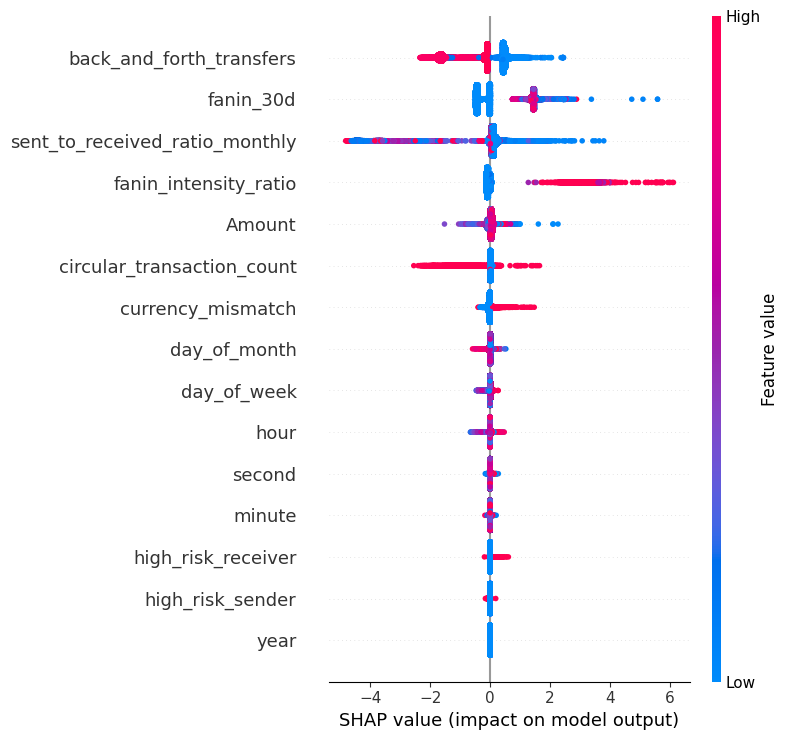

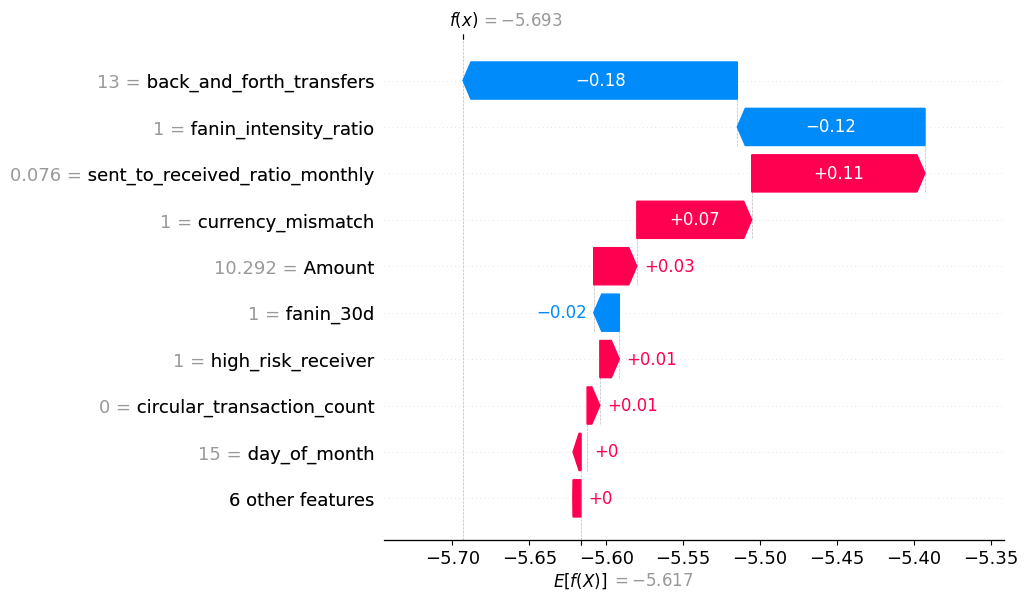

In [9]:
# Subsample test data
X_sample = X_test_df.sample(n=100000, random_state=42)

# Use optimized TreeExplainer settings
explainer = shap.TreeExplainer(
    final_model,
    feature_perturbation="tree_path_dependent",
    model_output="raw"
)

# Compute SHAP values only on the sample
shap_values = explainer.shap_values(X_sample)

# Use unified SHAP API (optional, if SHAP ≥0.41)
explainer = shap.Explainer(final_model, X_sample)
shap_values = explainer(X_sample)

# Visualize summary plot
shap.summary_plot(shap_values, X_sample)

# Visualize one row
shap.plots.waterfall(shap_values[0])

In [14]:
import matplotlib.pyplot as plt

In [20]:
back_and_forth_index = X_sample.columns.get_loc("back_and_forth_transfers")

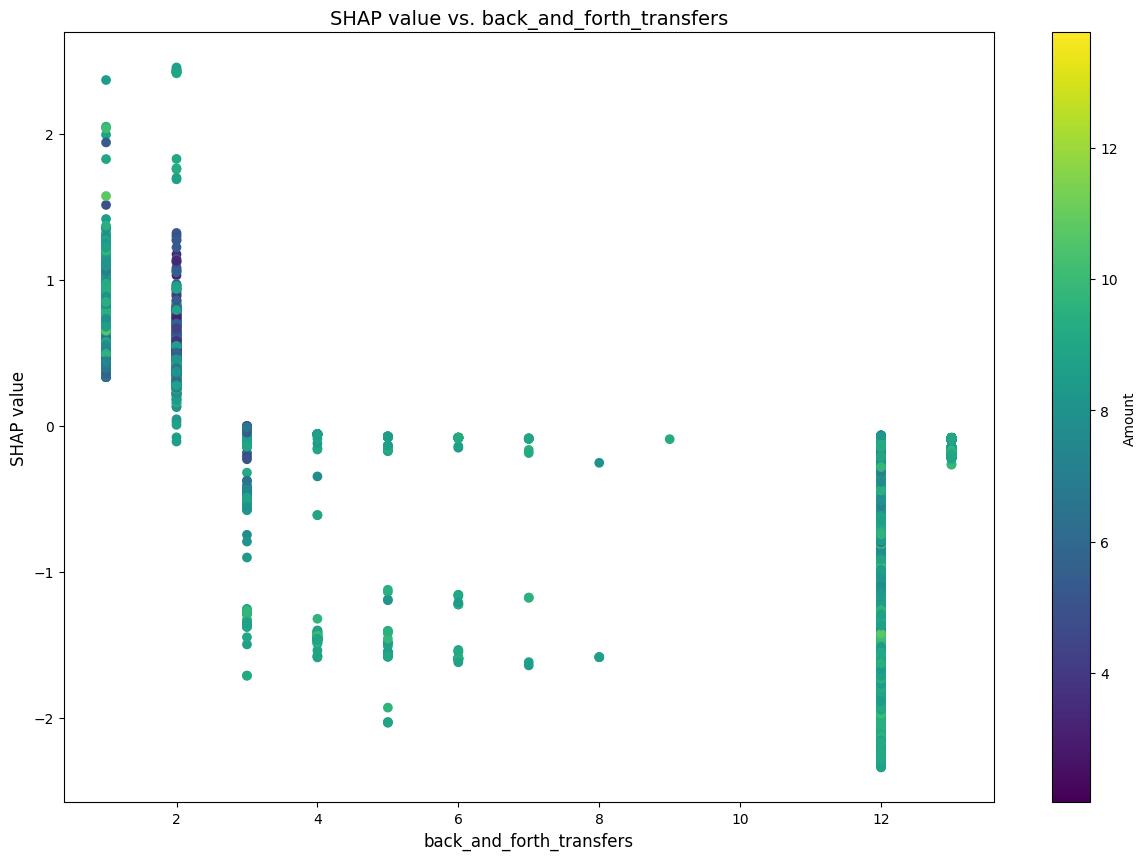

In [24]:
plt.figure(figsize=(15, 10))
plt.scatter(X_sample["back_and_forth_transfers"], shap_values[:, back_and_forth_index].values, c=X_sample["Amount"], cmap="viridis")
plt.xlabel("back_and_forth_transfers", fontsize=12)
plt.ylabel("SHAP value", fontsize=12)
plt.title("SHAP value vs. back_and_forth_transfers", fontsize=14)
plt.colorbar(label="Amount")
plt.show()

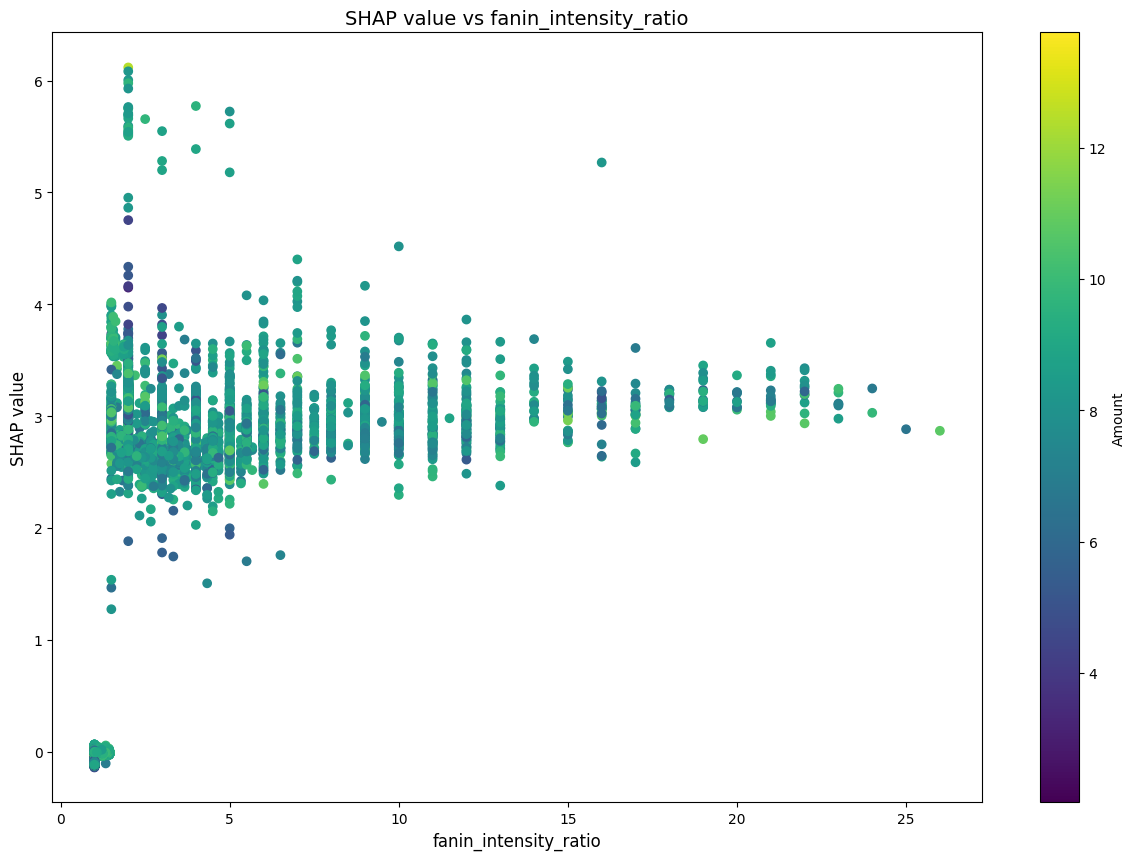

In [25]:
fanin_intensity_ratio_index = X_sample.columns.get_loc("fanin_intensity_ratio")

plt.figure(figsize=(15, 10))
plt.scatter(X_sample["fanin_intensity_ratio"], shap_values[:, fanin_intensity_ratio_index].values, c=X_sample["Amount"], cmap="viridis")
plt.xlabel("fanin_intensity_ratio", fontsize=12)
plt.ylabel("SHAP value", fontsize=12)
plt.title("SHAP value vs fanin_intensity_ratio", fontsize=14)
plt.colorbar(label="Amount")
plt.show()

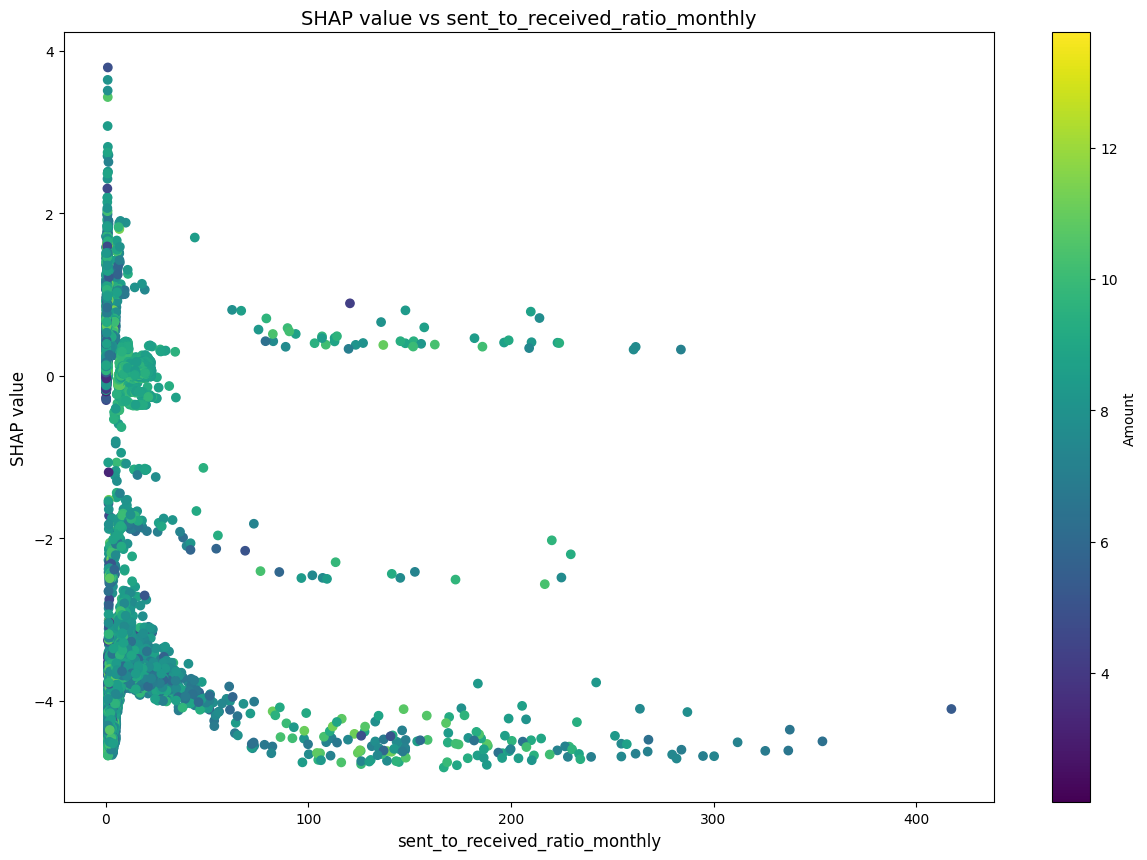

In [27]:
sent_to_received_ratio_monthly_index = X_sample.columns.get_loc("sent_to_received_ratio_monthly")

plt.figure(figsize=(15, 10))
plt.scatter(X_sample["sent_to_received_ratio_monthly"], shap_values[:, sent_to_received_ratio_monthly_index].values, c=X_sample["Amount"], cmap="viridis")
plt.xlabel("sent_to_received_ratio_monthly", fontsize=12)
plt.ylabel("SHAP value", fontsize=12)
plt.title("SHAP value vs sent_to_received_ratio_monthly", fontsize=14)
plt.colorbar(label="Amount")
plt.show()

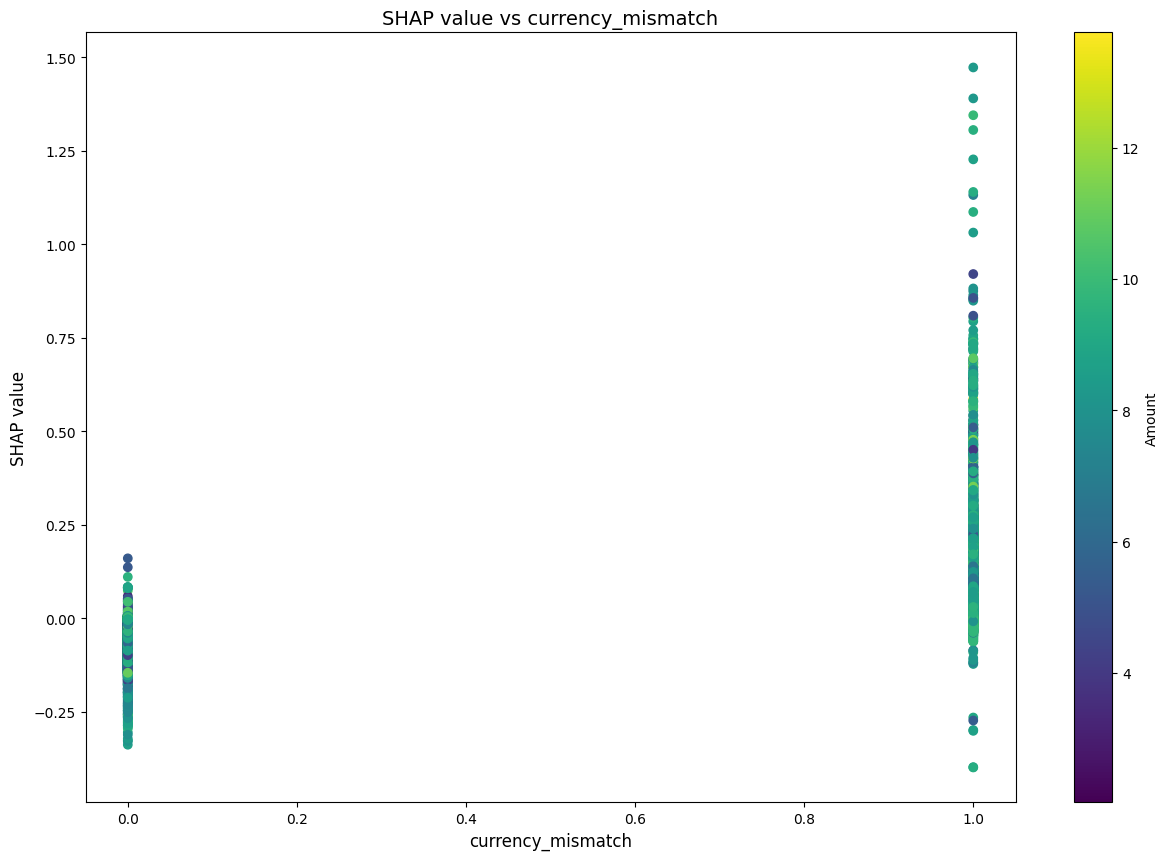

In [28]:
currency_mismatch_index = X_sample.columns.get_loc("currency_mismatch")

plt.figure(figsize=(15, 10))
plt.scatter(X_sample["currency_mismatch"], shap_values[:, currency_mismatch_index].values, c=X_sample["Amount"], cmap="viridis")
plt.xlabel("currency_mismatch", fontsize=12)
plt.ylabel("SHAP value", fontsize=12)
plt.title("SHAP value vs currency_mismatch", fontsize=14)
plt.colorbar(label="Amount")
plt.show()

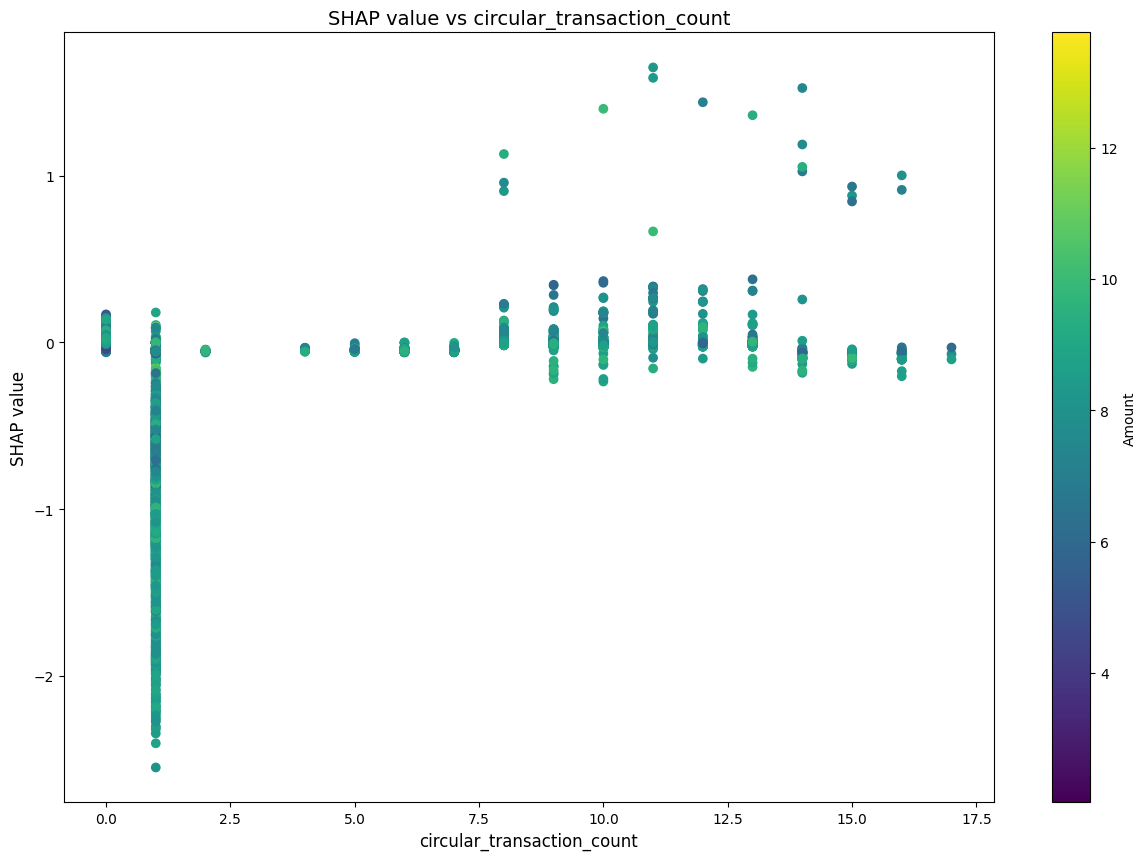

In [29]:
circular_transaction_count_index = X_sample.columns.get_loc("circular_transaction_count")

plt.figure(figsize=(15, 10))
plt.scatter(X_sample["circular_transaction_count"], shap_values[:, circular_transaction_count_index].values, c=X_sample["Amount"], cmap="viridis")
plt.xlabel("circular_transaction_count", fontsize=12)
plt.ylabel("SHAP value", fontsize=12)
plt.title("SHAP value vs circular_transaction_count", fontsize=14)
plt.colorbar(label="Amount")
plt.show()

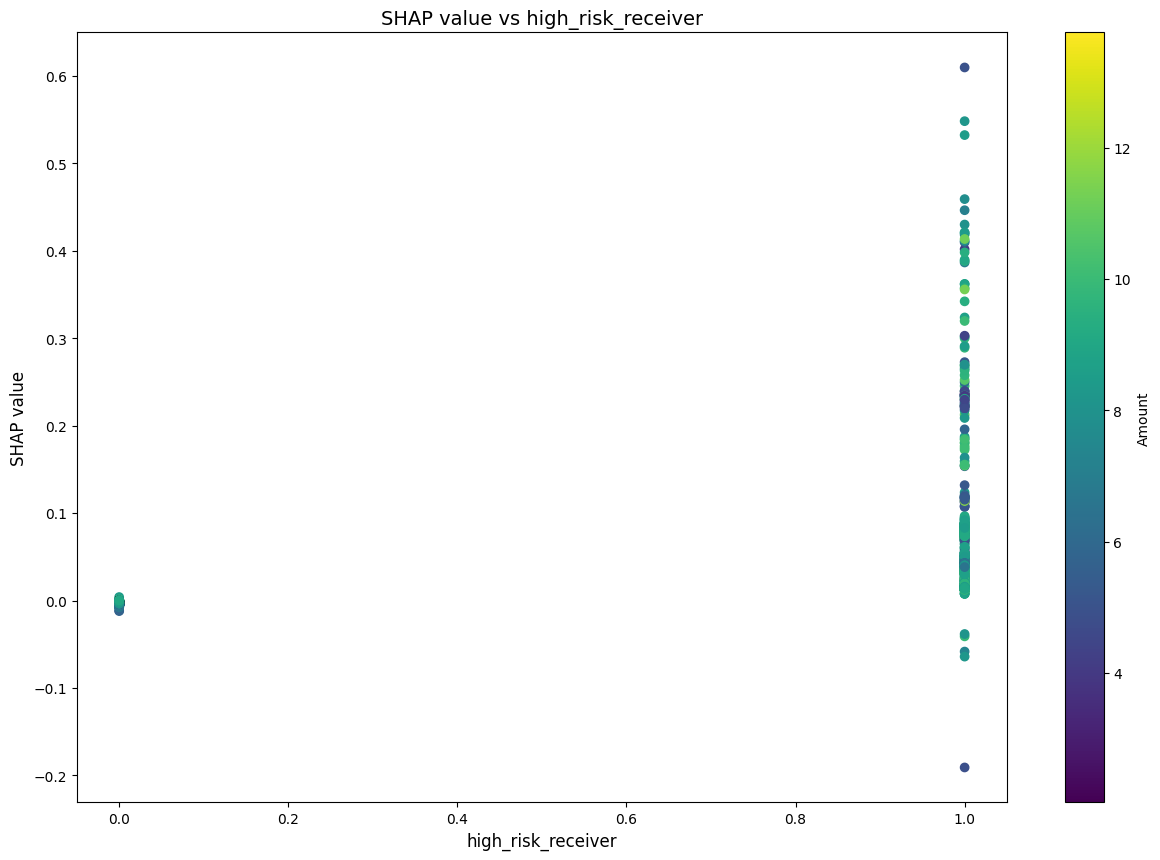

In [30]:
high_risk_receiver_index = X_sample.columns.get_loc("high_risk_receiver")

plt.figure(figsize=(15, 10))
plt.scatter(X_sample["high_risk_receiver"], shap_values[:, high_risk_receiver_index].values, c=X_sample["Amount"], cmap="viridis")
plt.xlabel("high_risk_receiver", fontsize=12)
plt.ylabel("SHAP value", fontsize=12)
plt.title("SHAP value vs high_risk_receiver", fontsize=14)
plt.colorbar(label="Amount")
plt.show()